In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import random
import time
from numpy.random import seed
from numpy.random import randint
import heapq

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.adjacency_list = [[] for _ in range(vertices)]

    def add_edge(self, u, v, weight):
        self.adjacency_list[u].append((v, weight))
        self.adjacency_list[v].append((u, weight))

    def dijkstra(self, start):
        # Initialize distance array with infinite values for all vertices
        distance = [float('inf')] * self.vertices
        # Set distance to the start node to 0
        distance[start] = 0

        # Create a priority queue (min heap) to store vertices and their distances
        priority_queue = [(0, start)]

        while priority_queue:
            # Get the vertex with the smallest distance
            dist, u = heapq.heappop(priority_queue)

            # Iterate through neighbors of u
            for neighbor, edge_weight in self.adjacency_list[u]:
                # Calculate the new distance to neighbor
                new_distance = dist + edge_weight
                # If the new distance is smaller than the current distance, update it
                if new_distance < distance[neighbor]:
                    distance[neighbor] = new_distance
                    # Push the updated distance and neighbor to the priority queue
                    heapq.heappush(priority_queue, (new_distance, neighbor))

        return distance

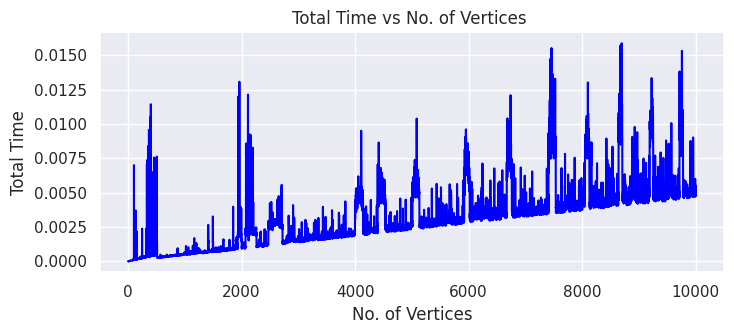

In [ ]:
#Total time
finaly =[]
finalx =[]
start_vertex = 0

for i in range(1,10000,1):
    graph = Graph(i)
    # Add edges and their weights
    for j in range(1,i,1):
      graph.add_edge(j-1, j, j)
    finalx.append(i)
    start_time = time.time()
    distances = graph.dijkstra(start_vertex)
    end_time = time.time()
    cpu_time_used = end_time - start_time
    finaly.append(cpu_time_used)

#for vertex, dist in enumerate(distances):
    #print(f"Distance from node {start_vertex} to node {vertex} is {dist}")

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Total Time vs No. of Vertices ")
plt.ylabel("Total Time")
plt.xlabel("No. of Vertices")
plt.plot(x, y, color="blue")

plt.show()

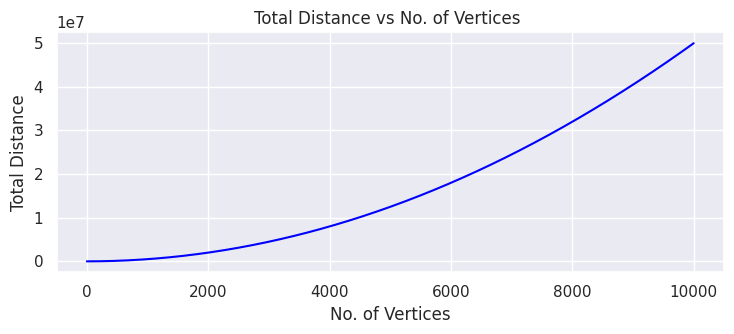

In [ ]:
#Total Distance
finaly =[]
finalx =[]

for i in range(1,10000,1):
    graph = Graph(i)
    # Add edges and their weights
    for j in range(1,i,1):
      graph.add_edge(j-1, j, j)
    finalx.append(i)

start_vertex = 0
distances = graph.dijkstra(start_vertex)

for vertex, dist in enumerate(distances):
    finaly.append(dist)
    #print(f"Distance from node {start_vertex} to node {vertex} is {dist}")


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Total Distance vs No. of Vertices ")
plt.ylabel("Total Distance")
plt.xlabel("No. of Vertices")
plt.plot(x, y, color="blue")

plt.show()